## Split - Apply - Combine

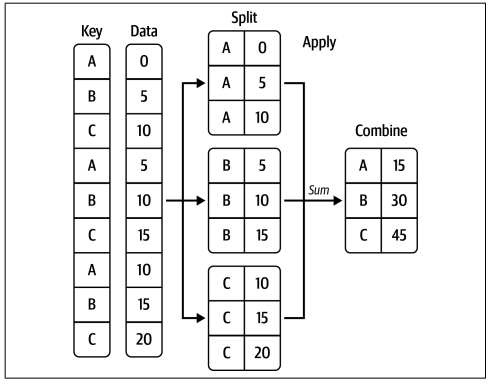

In [1]:
import numpy as np
import pandas as pd

In [37]:
df = pd.DataFrame({"key1":["a", "a", None, "b", "b", "a", None],
                 "key2": pd.Series([1, 2, 1, 2, 1, None, 1], dtype="Int64"), 
                 "data1": np.random.standard_normal(7),
                 "data2": np.random.standard_normal(7)})
df

,key1,key2,data1,data2
0,a,1,0.995187,0.186537
1,a,2,-2.639180,0.202073
2,None,1,-1.347360,-0.395201
3,b,2,-1.356224,1.000904
4,b,1,0.430611,-1.957774
5,a,<NA>,0.822211,-2.223515
6,None,1,0.952322,-1.844616


In [38]:
# compute mean of data1 using key1

grouped = df["data1"].groupby(df["key1"])
grouped

In [39]:
grouped.mean()

key1
a   -0.273928
b   -0.462807
Name: data1, dtype: float64

In [40]:
means = df['data1'].groupby([df["key1"], df["key2"]]).mean()
means

key1  key2
a     1       0.995187
      2      -2.639180
b     1       0.430611
      2      -1.356224
Name: data1, dtype: float64

In [41]:
means.unstack()

key2,1,2
key1,,
a,0.995187,-2.639180
b,0.430611,-1.356224


In [42]:
states = np.array(["OH", "CA", "CA", "OH", "OH", "CA", "OH"])
years = [2005, 2005, 2006, 2005, 2006, 2005, 2006]

df["data1"].groupby([states, years]).mean()

CA  2005   -0.908485
    2006   -1.347360
OH  2005   -0.180519
    2006    0.691466
Name: data1, dtype: float64

In [43]:
df.groupby("key1").mean()

,key2,data1,data2
key1,,,
a,1.5,-0.273928,-0.611635
b,1.5,-0.462807,-0.478435


In [53]:
df.groupby(["key2"]).sum()

,key1,data1,data2
key2,,,
1,ab,1.030759,-4.011055
2,ab,-3.995404,1.202978


In [50]:
df.groupby(["key1","key2"]).mean()

data1     data2
key1 key2                    
a    1     0.995187  0.186537
     2    -2.639180  0.202073
b    1     0.430611 -1.957774
     2    -1.356224  1.000904

In [54]:
df.groupby(["key1","key2"]).size()

key1  key2
a     1       1
      2       1
b     1       1
      2       1
dtype: int64

In [55]:
df.groupby(["key1","key2"], dropna=False).size()

key1  key2
a     1       1
      2       1
      <NA>    1
b     1       1
      2       1
NaN   1       2
dtype: int64

In [57]:
df.groupby(["key1"]).count()

,key2,data1,data2
key1,,,
a,2,3,3
b,2,2,2


### Iterating over group

In [ ]:
342